## 1 - Packages

Let's first import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the main package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- dnn_utils provides some necessary functions for this notebook.
- testCases provides some test cases to assess the correctness of your functions
- np.random.seed(1) is used to keep all the random function calls consistent. It will help us grade your work. Please don't change the seed. 

In [160]:
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
import h5py
import math
import matplotlib.pyplot as plt
import scipy

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))
print("scipy version: {}".format(scipy.__version__))   

TensorFlow version: 2.1.0
Eager execution: True
scipy version: 1.4.1


In [161]:
def initialize_parameters_CNN_2layers():
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    tf.random.set_seed(1)
    parameters = {}
    listp = []  
    
    initializer = tf.keras.initializers.GlorotNormal(seed = 0)
    parameters['W1'] = tf.Variable( initializer( shape=(4, 4, 3, 8), dtype=tf.dtypes.float32))
    parameters['W2'] = tf.Variable( initializer( shape=(2, 2, 8, 16), dtype=tf.dtypes.float32))
    parameters['W3'] = tf.Variable( initializer( shape=(6,64), dtype=tf.dtypes.float32))
                                               

    for l in range(1, 4): 
            listp.append(parameters["W"+str(l)])

    
    return listp

In [162]:
listp_test = initialize_parameters_CNN_2layers()
print (listp_test)

[<tf.Variable 'Variable:0' shape=(4, 4, 3, 8) dtype=float32, numpy=
array([[[[-0.2056607    , -0.058337234  , -0.08025538   ,
           0.010544738  , -0.032211605  ,  0.010961418  ,
          -0.10336155   ,  0.08746794   ],
         [ 0.20160557   , -0.014191296  ,  0.046245974  ,
           0.05640402   , -0.07115588   , -0.004663535  ,
          -0.071886525  ,  0.04198296   ],
         [ 0.11124081   ,  0.03141133   , -0.13370019   ,
          -0.16261466   ,  0.11981839   , -0.03923665   ,
           0.16329722   ,  0.12666985   ]],

        [[-0.15021932   ,  0.1304466    ,  0.13095827   ,
           0.037389427  ,  0.009515136  ,  0.06832766   ,
          -0.055537704  ,  0.079958804  ],
         [ 0.1026027    , -0.1641346    , -0.015676552  ,
          -0.16435538   , -0.030360183  , -0.017152643  ,
          -0.15462536   ,  0.046536155  ],
         [ 0.11646616   ,  0.037236407  , -0.051597413  ,
          -0.050739672  , -0.23097187   , -0.055465907  ,
           0.173337

# 4 - Forward propagation module

In [191]:
def L_model_forward_list_CNN_3layers (X, listp):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> FULLYCONNECTED
    
    Note that for simplicity and grading purposes, we'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "W2"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = listp[0]
    W2 = listp[1]
    W3 = listp[2]
    
    ### START CODE HERE ###
    # CONV2D: stride of 1, padding 'SAME'
    Z1 = tf.nn.conv2d(X, W1, strides = [1,1,1,1], padding = 'SAME')
    # RELU
    A1 = tf.nn.relu(Z1)
    # MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tf.nn.max_pool(A1, ksize = [1,8,8,1], strides = [1,8,8,1], padding = 'SAME')
    # CONV2D: filters W2, stride 1, padding 'SAME'
    Z2 = tf.nn.conv2d(P1,W2, strides = [1,1,1,1], padding = 'SAME')
    # RELU
    A2 = tf.nn.relu(Z2)
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.nn.max_pool(A2, ksize = [1,4,4,1], strides = [1,4,4,1], padding = 'SAME')
    # FLATTEN
    flatten_layer = tf.keras.layers.Flatten()  # instantiate the layer
    F = flatten_layer(P2)                      # call it on the given tensor
    # FULLY-CONNECTED without non-linear activation function (not not call softmax).
    # 6 neurons in output layer. Hint: one of the arguments should be "activation_fn=None" 
    Z3 = tf.matmul(W3, tf.transpose(F))

    return Z3

In [164]:
F_test = tf.constant([[3.2, 4.01, 4.85, 7.32], [3.2, 4.01, 4.85, 7.32], [3.63, 9.1,5.45,6.41],  [4.2, 7.12, 0.,5.1],[3.2, 4.01, 4.85, 7.32], [3.63, 9.1,5.45,6.41],  [4.2, 7.12, 0.,5.1], [5.5, 7.12, 0.,5.1], [5.2, 7.12, 0.,5.1], [4.9, 7.12, 0.,5.1]])
W_test = tf.constant([[-0.03269102, 7.12, 0.,5.1], [-0.02149617, 7.12, 0.,5.1], [-0.04413767, 7.12, 0.,5.1]])
print("F_test shape: ", F_test.shape)
print("W_test shape: ", W_test.shape)
Z_test = tf.matmul(W_test, tf.transpose (F_test))
print("Z_test shape: ", Z_test.shape)

F_test shape:  (10, 4)
W_test shape:  (3, 4)
Z_test shape:  (3, 10)


In [256]:
def compute_cost_CNN (ZL, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (number of examples, 6)
    Y -- "true" labels vector placeholder, same shape as Z3
    method: softmax_cross_entropy_with_logits
    """
   
    #compute softmax
    cost = tf.nn.softmax(tf.transpose(ZL), axis= 1)
   
    #compute cross_entropy
    cost = -tf.reduce_mean(tf.reduce_sum(Y * tf.math.log(cost),1))
    
    return cost

In [251]:
# Test softmax_cross_entropy_with_logits

F_test = tf.constant([[0.1, 0.1, 0.1, 0.1], [0, 4.01, 4.85, 7.32], [0, 9.1,5.45,6.41],  [0, 7.12, 0.,5.1],[3.2, 4.01, 4.85, 7.32], [3.63, 9.1,5.45,6.41],  [4.2, 7.12, 0.,5.1], [5.5, 7.12, 0.,5.1], [5.2, 7.12, 0.,5.1], [4.9, 7.12, 0.,5.1]])
labels_test = tf.constant([[0.], [0.], [0.],  [1.],[0.], [1.],  [0.], [1.], [0.], [1.]])

print("F_test shape: ", F_test.shape)
print("F_test: ", F_test)

S_test = tf.math.reduce_sum(tf.math.exp(F_test),axis=1)
print("S_test(sum): ", S_test)
Q_test = tf.math.divide(tf.math.exp(F_test),tf.reshape(S_test, (-1, 1)))
print("Q_test: ", Q_test)
Q_test = -tf.reduce_sum(labels_test * tf.math.log(Q_test),1)
print("Q_test: ", Q_test)
Q_test= tf.reduce_mean(Q_test)
print("Q_test: ", Q_test)
softmax_test = tf.nn.softmax(F_test,axis= 1)
print("softmax_test: ", softmax_test)

cost_test = tf.nn.softmax_cross_entropy_with_logits(logits = F_test, labels = labels_test)
print("cost_test: ", cost_test)
cost_test= tf.reduce_mean(cost_test)
print("cost_test: ", cost_test)

F_test shape:  (10, 4)
F_test:  tf.Tensor(
[[0.1  0.1  0.1  0.1 ]
 [0.   4.01 4.85 7.32]
 [0.   9.1  5.45 6.41]
 [0.   7.12 0.   5.1 ]
 [3.2  4.01 4.85 7.32]
 [3.63 9.1  5.45 6.41]
 [4.2  7.12 0.   5.1 ]
 [5.5  7.12 0.   5.1 ]
 [5.2  7.12 0.   5.1 ]
 [4.9  7.12 0.   5.1 ]], shape=(10, 4), dtype=float32)
S_test(sum):  tf.Tensor(
[4.4206839e+00 1.6940916e+03 9.7969473e+03 1.4024722e+03 1.7176240e+03
 9.8336602e+03 1.4681584e+03 1.6461641e+03 1.5827444e+03 1.5357620e+03], shape=(10,), dtype=float32)
Q_test:  tf.Tensor(
[[2.50000000e-01 2.50000000e-01 2.50000000e-01 2.50000000e-01]
 [5.90286858e-04 3.25524807e-02 7.54034668e-02 8.91453743e-01]
 [1.02072612e-04 9.14090455e-01 2.37582289e-02 6.20492846e-02]
 [7.13026617e-04 8.81622016e-01 7.13026617e-04 1.16951980e-01]
 [1.42828301e-02 3.21064927e-02 7.43703991e-02 8.79240274e-01]
 [3.83507484e-03 9.10677791e-01 2.36695297e-02 6.18176274e-02]
 [4.54217456e-02 8.42177689e-01 6.81125384e-04 1.11719482e-01]
 [1.48643702e-01 7.51110017e-01 6.074

In [51]:
def random_mini_batches_CNN(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples) (m, Hi, Wi, Ci)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples) (m, n_y)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[0]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:,:,:]
    shuffled_Y = Y[permutation,:]

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:,:,:]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m,:,:,:]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [219]:
def model_tf_CNN_3Layers(X, Y, learning_rate = 0.0075, num_epochs = 1500, minibatch_size = 32, print_cost = True, lambd = 0., ADAM = False):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    
    if ADAM:
        beta1 = 0.9
        beta2 = 0.999
        epsilon = 1e-4
    else:    
        beta1 = 0
        beta2 = 0
        epsilon = 0 
        
    print ("learning_rate:" + str(learning_rate)) 
    print ("minibatch_size:" + str(minibatch_size)) 
    print ("num_epochs:" + str(num_epochs)) 
    print ("lambd:" + str(lambd)) 
    #print ("keep_prob:" + str(keep_prob)) 
    print ("beta1:" + str(beta1)) 
    print ("beta2:" + str(beta2)) 
    print ("epsilon:" + str(epsilon))
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.random.set_seed(1)                             # to keep consistent results
    seed = 1                                          # to keep consistent results
    
    (m, n_H0, n_W0, n_C0) = X.shape             
    n_y = Y.shape[1]                          # n_y : output size

    print ("m:" + str(m))
    print ("n_H0:" + str(n_H0))
    print ("n_W0:" + str(n_W0))
    print ("n_C0:" + str(n_C0))    
    print ("n_y:" + str(n_y))
    costs = []
    
    # Initialize parameters
    listp = initialize_parameters_CNN_2layers()  #2 layers en dur
    
    if ADAM:
        optimizer = tf.optimizers.Adam(learning_rate=learning_rate, beta_1=beta1, beta_2=beta2, epsilon=epsilon)
    else:   
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
       
    # Do the training loop
    for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            c = 0.
            seed = seed + 1
         
            # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch          
            minibatches = random_mini_batches_CNN(X, Y, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                mini_m = minibatch_X.shape[1]
                    
                with tf.GradientTape() as tape:
                     ZL = L_model_forward_list_CNN_3layers (minibatch_X, listp)
                     #print ("ZL: " +str(ZL))                      
                     
                     loss_value= compute_cost_CNN (ZL, minibatch_Y)
                     #print ("loss_value: " +str(loss_value)) 
                        
                grads = tape.gradient(loss_value, listp)
                #print ("grads: " +str(grads))
                grads_and_vars = zip(grads, listp)
                optimizer.apply_gradients(grads_and_vars)             
                
                epoch_cost += loss_value
                c = c + 1

            epoch_cost = epoch_cost / c
            
            # Print the cost every epoch
            if print_cost == True and epoch % 10 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 10 == 0:
                costs.append(epoch_cost)
             
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per fives)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
        
    return listp

In [169]:
def load_dataset_signs():
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [170]:
train_x_orig, train_y_orig, test_x_orig, test_y_orig, classes = load_dataset_signs()

In [171]:
def infos (X):
    Q = X[:, 0:1]
    print ("0 shape: " + str(Q.shape))
    print ("0 average: " + str(np.average(Q)))
    print ("0 std: " + str(np.std(Q)))
    print ("0: " + str(Q))
    
    return

In [172]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

AttributeError: 'numpy.int64' object has no attribute 'decode'

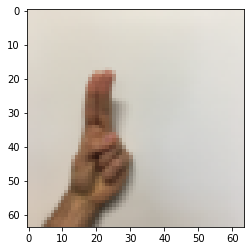

In [173]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y_orig[0,index]) + ". It's a " + classes[train_y_orig[0,index]].decode("utf-8") +  " picture.")

In [174]:
train_x = train_x_orig.astype(np.float32)/255.
test_x = test_x_orig.astype(np.float32)/255.
train_y = convert_to_one_hot(train_y_orig, 6).T
train_y = train_y.astype(np.float32)
test_y = convert_to_one_hot(test_y_orig, 6).T
test_y = test_y.astype(np.float32)
print ("number of training examples = " + str(train_x.shape[0]))
print ("number of test examples = " + str(test_x.shape[0]))
print ("train_x shape: " + str(train_x.shape))
print ("train_x dtype: " + str(train_x.dtype))
print ("train_y shape: " + str(train_y.shape))
print ("train_y dtype: " + str(train_y.dtype))
print ("test_x shape: " + str(test_x.shape))
print ("test_y shape: " + str(test_y.shape))
conv_layers = {}

number of training examples = 1080
number of test examples = 120
train_x shape: (1080, 64, 64, 3)
train_x dtype: float32
train_y shape: (1080, 6)
train_y dtype: float32
test_x shape: (120, 64, 64, 3)
test_y shape: (120, 6)


learning_rate:0.009
minibatch_size:64
num_epochs:100
lambd:0.0
beta1:0.9
beta2:0.999
epsilon:0.0001
m:1080
n_H0:64
n_W0:64
n_C0:3
n_y:6
Cost after epoch 0: 1.802190
Cost after epoch 10: 1.007048
Cost after epoch 20: 0.709725
Cost after epoch 30: 0.520906
Cost after epoch 40: 0.456905
Cost after epoch 50: 0.376530
Cost after epoch 60: 0.375832
Cost after epoch 70: 0.329991
Cost after epoch 80: 0.267324
Cost after epoch 90: 0.296682


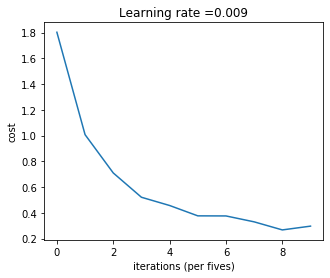

In [259]:
np.set_printoptions(precision=15)
listp = model_tf_CNN_3Layers(train_x, train_y, learning_rate = 0.009, num_epochs = 100, minibatch_size = 64, print_cost = True, lambd = 0., ADAM = True)

In [260]:
def predict_tf_CNN_3layers(X, Y, listp):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
   
    # Forward propagation
    ZL = L_model_forward_list_CNN_3layers (X, listp)
    
    # Calculate the correct predictions
    predict_op = tf.argmax(ZL, 0)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
 
    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    
    return accuracy

In [262]:
accuracy_train = predict_tf_CNN_3layers(train_x, train_y, listp)
print("accuracy train: ",str(accuracy_train))

accuracy train:  tf.Tensor(0.9037037, shape=(), dtype=float32)


In [263]:
accuracy_test = predict_tf_CNN_3layers(test_x, test_y, listp)
print("accuracy test: ",str(accuracy_test))  

accuracy test:  tf.Tensor(0.725, shape=(), dtype=float32)
